### NOTES:
BART: standard deviations not calculated correctly.


In [37]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_columns', 2000)
%matplotlib inline

In [2]:
dmt = pd.read_csv('data/DMT_Data_Merged_10.25.17.csv')

## BART

In [3]:
dmt.head()

internalId externalId passive_phone_model  passive_bat_charge_avg  \
0       70052     2w4MVh                 NaN                     NaN   
1       70061     2XdEfU              iPhone                6.835596   
2       70087     2XyVyJ                 NaN                     NaN   
3       70074     34fjYg                 NaN                     NaN   
4       70133     3FGrfL                 NaN                     NaN   

   passive_bat_charge_less_5hr  passive_bat_charge_start_mean  \
0                          NaN                            NaN   
1                     0.708333                      52.611111   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   

   passive_bat_charge_end_mean  passive_bat_charge_increase_mean  \
0                          NaN                               NaN   
1                    75.104167                         22.493056   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   

   passive_bat_charge_less_20percent  passive_bat_charge_greater_80percent  \
0                                NaN                                   NaN   
1                           0.159722                                  0.25   
2                                NaN                                   NaN   
3                                NaN                                   NaN   
4                                NaN                                   NaN   

   passive_screen_unlock_num  passive_screen_unlock_less_1min  \
0                        NaN                              NaN   
1                        573                          0.47993   
2                        NaN                              NaN   
3                        NaN                              NaN   
4                        NaN                              NaN   

   passive_screen_unlock_avg_per_day  passive_screen_unlock_avg_time_min  \
0                                NaN                                 NaN   
1                          27.130371                            4.941992   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   passive_screen_unlock_time_ratio  passive_call_out  passive_call_in  \
0                               NaN               NaN              NaN   
1                           0.09311                22               26   
2                               NaN               NaN              NaN   
3                               NaN               NaN              NaN   
4                               NaN               NaN              NaN   

   passive_call_total  passive_call_out_ratio  passive_call_avg_min  \
0                 NaN                     NaN                   NaN   
1                  48                0.458333              2.859375   
2                 NaN                     NaN                   NaN   
3                 NaN                     NaN                   NaN   
4                 NaN                     NaN                   NaN   

   passive_call_out_wait_durations  SAGE_demographics_v2___ROW_ID  \
0                              NaN                             39   
1                         8.636364                             50   
2                              NaN                             77   
3                              NaN                             74   
4                              NaN                            149   

   SAGE_demographics_v2___ROW_VERSION       SAGE_demographics_v2___recordId  \
0                                  16  0843556f-1a8a-49a9-9684-5ddc1c204bc6   
1       

In [42]:
def col_convert(row, segment=None):
    if pd.notnull(row) and segment:
        seg = segment - 1
        ix = (0 + (seg * 5), 5 + seg * 5)
        return [float(x) for x in row.strip('[]').split(',')][ix[0]:ix[1]]
    elif pd.notnull(row) and not segment:
        return [float(x) for x in row.strip('[]').split(',')]
    else:
        return row

In [64]:
def check_bart(name):
    pumps = dmt[name + '___pumps_per_balloon'].apply(col_convert)
    pumps = pumps[pumps.notnull()]
    pumps_first = dmt[name + '___pumps_per_balloon'].apply(lambda x: col_convert(x, segment=1))
    pumps_first = pumps_first[pumps_first.notnull()]
    pumps_second = dmt[name + '___pumps_per_balloon'].apply(lambda x: col_convert(x, segment=2))
    pumps_second = pumps_second[pumps_second.notnull()]
    pumps_third = dmt[name + '___pumps_per_balloon'].apply(lambda x: col_convert(x, segment=3))
    pumps_third = pumps_third[pumps_third.notnull()]
        
    pumps_raw = pd.Series([item for sublist in pumps[pumps.notnull()] for item in sublist])
    print(pumps_raw.describe())
    pumps_raw.plot.hist()
    
    equal = all(
                [all(pumps.apply(lambda x: x[0:5]) == pumps_first),
                 all(pumps.apply(lambda x: x[5:10]) == pumps_second),
                 all(pumps.apply(lambda x: x[10:15]) == pumps_third)]
            )
    
    means = all(
                [all(np.isclose(pumps.apply(np.mean), dmt[name + '___pumps_mean'][dmt[name + '___pumps_mean'].notnull()],
                                                                                      equal_nan=True)),
                 all(pumps.apply(lambda x: np.mean(x[0:5])) == pumps_first.apply(np.mean)),
                 all(pumps.apply(lambda x: np.mean(x[5:10])) == pumps_second.apply(np.mean)),
                 all(pumps.apply(lambda x: np.mean(x[10:15])) == pumps_third.apply(np.mean))]
            )
    
    stds = all(
            [all(np.isclose(pumps.apply(np.std), dmt[name + '___pumps_standard_deviation'][dmt[name + "___pumps_standard_deviation"].notnull()], 
                                                                                           equal_nan=True)),
             all(pumps.apply(lambda x: np.std(x[0:5])) == pumps_first.apply(np.std)),
             all(pumps.apply(lambda x: np.std(x[5:10])) == pumps_second.apply(np.std)),
             all(pumps.apply(lambda x: np.std(x[10:15])) == pumps_third.apply(np.std))]
            )
    print()
    print('The three segments align with original data:', equal)
    print('Means are correct:', means)
    print('Standard deviations are correct:', stds)

count    1530.000000
mean        4.238562
std         2.040775
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        12.000000
dtype: float64

The three segments align with original data: True
Means are correct: True
Standard deviations are correct: False


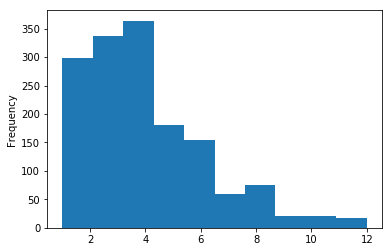

In [65]:
check_bart('SAGE_bart_v4_baseline_BART0.25')

count    1515.000000
mean        3.838944
std         1.983203
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        12.000000
dtype: float64

The three segments align with original data: True
Means are correct: True
Standard deviations are correct: False


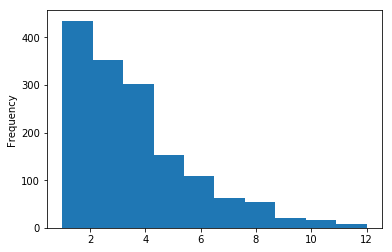

In [66]:
check_bart('SAGE_bart_v4_baseline_BART250.00')

count    1425.000000
mean        4.159298
std         1.925370
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        14.000000
dtype: float64

The three segments align with original data: True
Means are correct: True
Standard deviations are correct: False


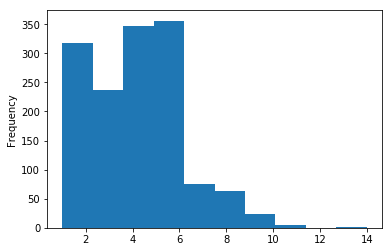

In [67]:
check_bart('SAGE_bart_v4_21_day_assessment_BART0.25')

count    1410.000000
mean        3.907801
std         1.705420
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        11.000000
dtype: float64

The three segments align with original data: True
Means are correct: True
Standard deviations are correct: False


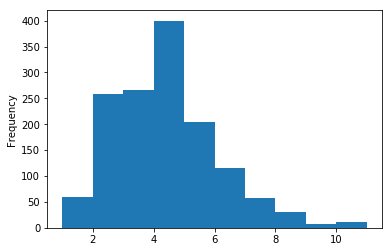

In [69]:
check_bart('SAGE_bart_v4_21_day_assessment_BART250.00')

## Delay Discounting

In [3]:
dmt.head(10)

internalId externalId passive_phone_model  passive_bat_charge_avg  \
0       70052     2w4MVh                 NaN                     NaN   
1       70061     2XdEfU              iPhone                6.835596   
2       70087     2XyVyJ                 NaN                     NaN   
3       70074     34fjYg                 NaN                     NaN   
4       70133     3FGrfL                 NaN                     NaN   
5       70024     3MhSZ8                 NaN                     NaN   
6       70122     3Vv4Le              iPhone                2.869832   
7       70039     3YSsRf              iPhone                6.110656   
8       70017     4chdWY                 NaN                     NaN   
9       70127     4CUvwZ                 NaN                     NaN   

   passive_bat_charge_less_5hr  passive_bat_charge_start_mean  \
0                          NaN                            NaN   
1                     0.708333                      52.611111   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   
5                          NaN                            NaN   
6                     0.344262                      68.377049   
7                     0.767442                      61.891473   
8                          NaN                            NaN   
9                          NaN                            NaN   

   passive_bat_charge_end_mean  passive_bat_charge_increase_mean  \
0                          NaN                               NaN   
1                    75.104167                         22.493056   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   
5                          NaN                               NaN   
6                    90.786885                         22.409836   
7                    79.713178                         17.821705   
8                          NaN                               NaN   
9                          NaN                               NaN   

   passive_bat_charge_less_20percent  passive_bat_charge_greater_80percent  \
0                                NaN                                   NaN   
1                           0.159722                              0.250000   
2                                NaN                                   NaN   
3                                NaN                                   NaN   
4                                NaN                                   NaN   
5                                NaN                                   NaN   
6                           0.032787                              0.508197   
7                           0.031008                              0.232558   
8                                NaN                                   NaN   
9                                NaN                                   NaN   

   passive_screen_unlock_num  passive_screen_unlock_less_1min  \
0                        NaN                              NaN   
1                        573                         0.479930   
2                        NaN                              NaN   
3                        NaN                              NaN   
4                        NaN                              NaN   
5                        NaN                              NaN   
6                       1274                         0.445055   
7                       1384                         0.441474   
8                        NaN                              NaN   
9                        NaN                              NaN   

   passive_screen_unlock_avg_per_day  passive_screen_unlock_avg_time_min  \
0                                NaN                                 NaN   
1                 

In [15]:
now = dmt['SAGE_delay_discounting_raw_v6_baseline_dd_time_6_month___nowArray'].apply(col_convert)
later = dmt['SAGE_delay_discounting_raw_v6_baseline_dd_time_6_month___laterArray'].apply(col_convert)
choice = dmt['SAGE_delay_discounting_raw_v6_baseline_dd_time_6_month___choiceArray'].apply(col_convert)
times = dmt['SAGE_delay_discounting_raw_v6_baseline_dd_time_6_month___times'].apply(col_convert)

Variable: nowArray
count    222.000000
mean      61.873592
std       24.046187
min        6.250000
25%       50.000000
50%       64.062500
75%       81.250000
max       98.437500
dtype: float64


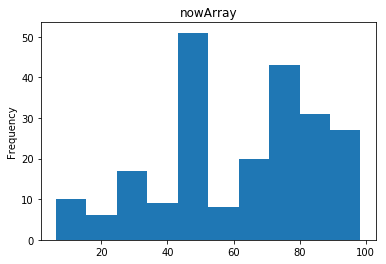


Variable: laterArray
count    222
mean     100
std        0
min      100
25%      100
50%      100
75%      100
max      100
dtype: float64


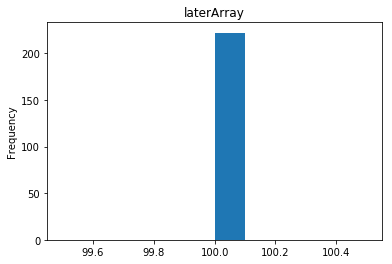


Variable: choiceArray
count    222.000000
mean      88.246059
std       21.682091
min       12.500000
25%       87.500000
50%      100.000000
75%      100.000000
max      100.000000
dtype: float64


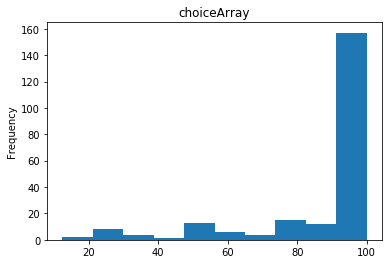


Variable: timesArray
count      222.000000
mean      2607.567382
std       3131.124602
min          0.601000
25%        609.971240
50%       1605.302483
75%       3515.274286
max      17113.201022
dtype: float64


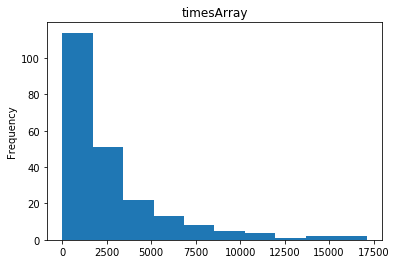

In [40]:
for name, data in zip(['now', 'later', 'choice', 'times'], [now, later, choice, times]):
    data_raw = pd.Series([item for sublist in data[data.notnull()] for item in sublist])
    print('Variable:', name + 'Array')
    print(data_raw.describe())
    data_raw.plot.hist(title=name + 'Array')
    plt.show()
    print()

## GoNoGo

In [41]:
dmt.head()

internalId externalId passive_phone_model  passive_bat_charge_avg  \
0       70052     2w4MVh                 NaN                     NaN   
1       70061     2XdEfU              iPhone                6.835596   
2       70087     2XyVyJ                 NaN                     NaN   
3       70074     34fjYg                 NaN                     NaN   
4       70133     3FGrfL                 NaN                     NaN   

   passive_bat_charge_less_5hr  passive_bat_charge_start_mean  \
0                          NaN                            NaN   
1                     0.708333                      52.611111   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   

   passive_bat_charge_end_mean  passive_bat_charge_increase_mean  \
0                          NaN                               NaN   
1                    75.104167                         22.493056   
2                          NaN                               NaN   
3                          NaN                               NaN   
4                          NaN                               NaN   

   passive_bat_charge_less_20percent  passive_bat_charge_greater_80percent  \
0                                NaN                                   NaN   
1                           0.159722                                  0.25   
2                                NaN                                   NaN   
3                                NaN                                   NaN   
4                                NaN                                   NaN   

   passive_screen_unlock_num  passive_screen_unlock_less_1min  \
0                        NaN                              NaN   
1                        573                          0.47993   
2                        NaN                              NaN   
3                        NaN                              NaN   
4                        NaN                              NaN   

   passive_screen_unlock_avg_per_day  passive_screen_unlock_avg_time_min  \
0                                NaN                                 NaN   
1                          27.130371                            4.941992   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

   passive_screen_unlock_time_ratio  passive_call_out  passive_call_in  \
0                               NaN               NaN              NaN   
1                           0.09311                22               26   
2                               NaN               NaN              NaN   
3                               NaN               NaN              NaN   
4                               NaN               NaN              NaN   

   passive_call_total  passive_call_out_ratio  passive_call_avg_min  \
0                 NaN                     NaN                   NaN   
1                  48                0.458333              2.859375   
2                 NaN                     NaN                   NaN   
3                 NaN                     NaN                   NaN   
4                 NaN                     NaN                   NaN   

   passive_call_out_wait_durations  SAGE_demographics_v2___ROW_ID  \
0                              NaN                             39   
1                         8.636364                             50   
2                              NaN                             77   
3                              NaN                             74   
4                              NaN                            149   

   SAGE_demographics_v2___ROW_VERSION       SAGE_demographics_v2___recordId  \
0                                  16  0843556f-1a8a-49a9-9684-5ddc1c204bc6   
1       